  ### Design a neural network for multiclass classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Checking null values
print(data.isnull().sum())

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


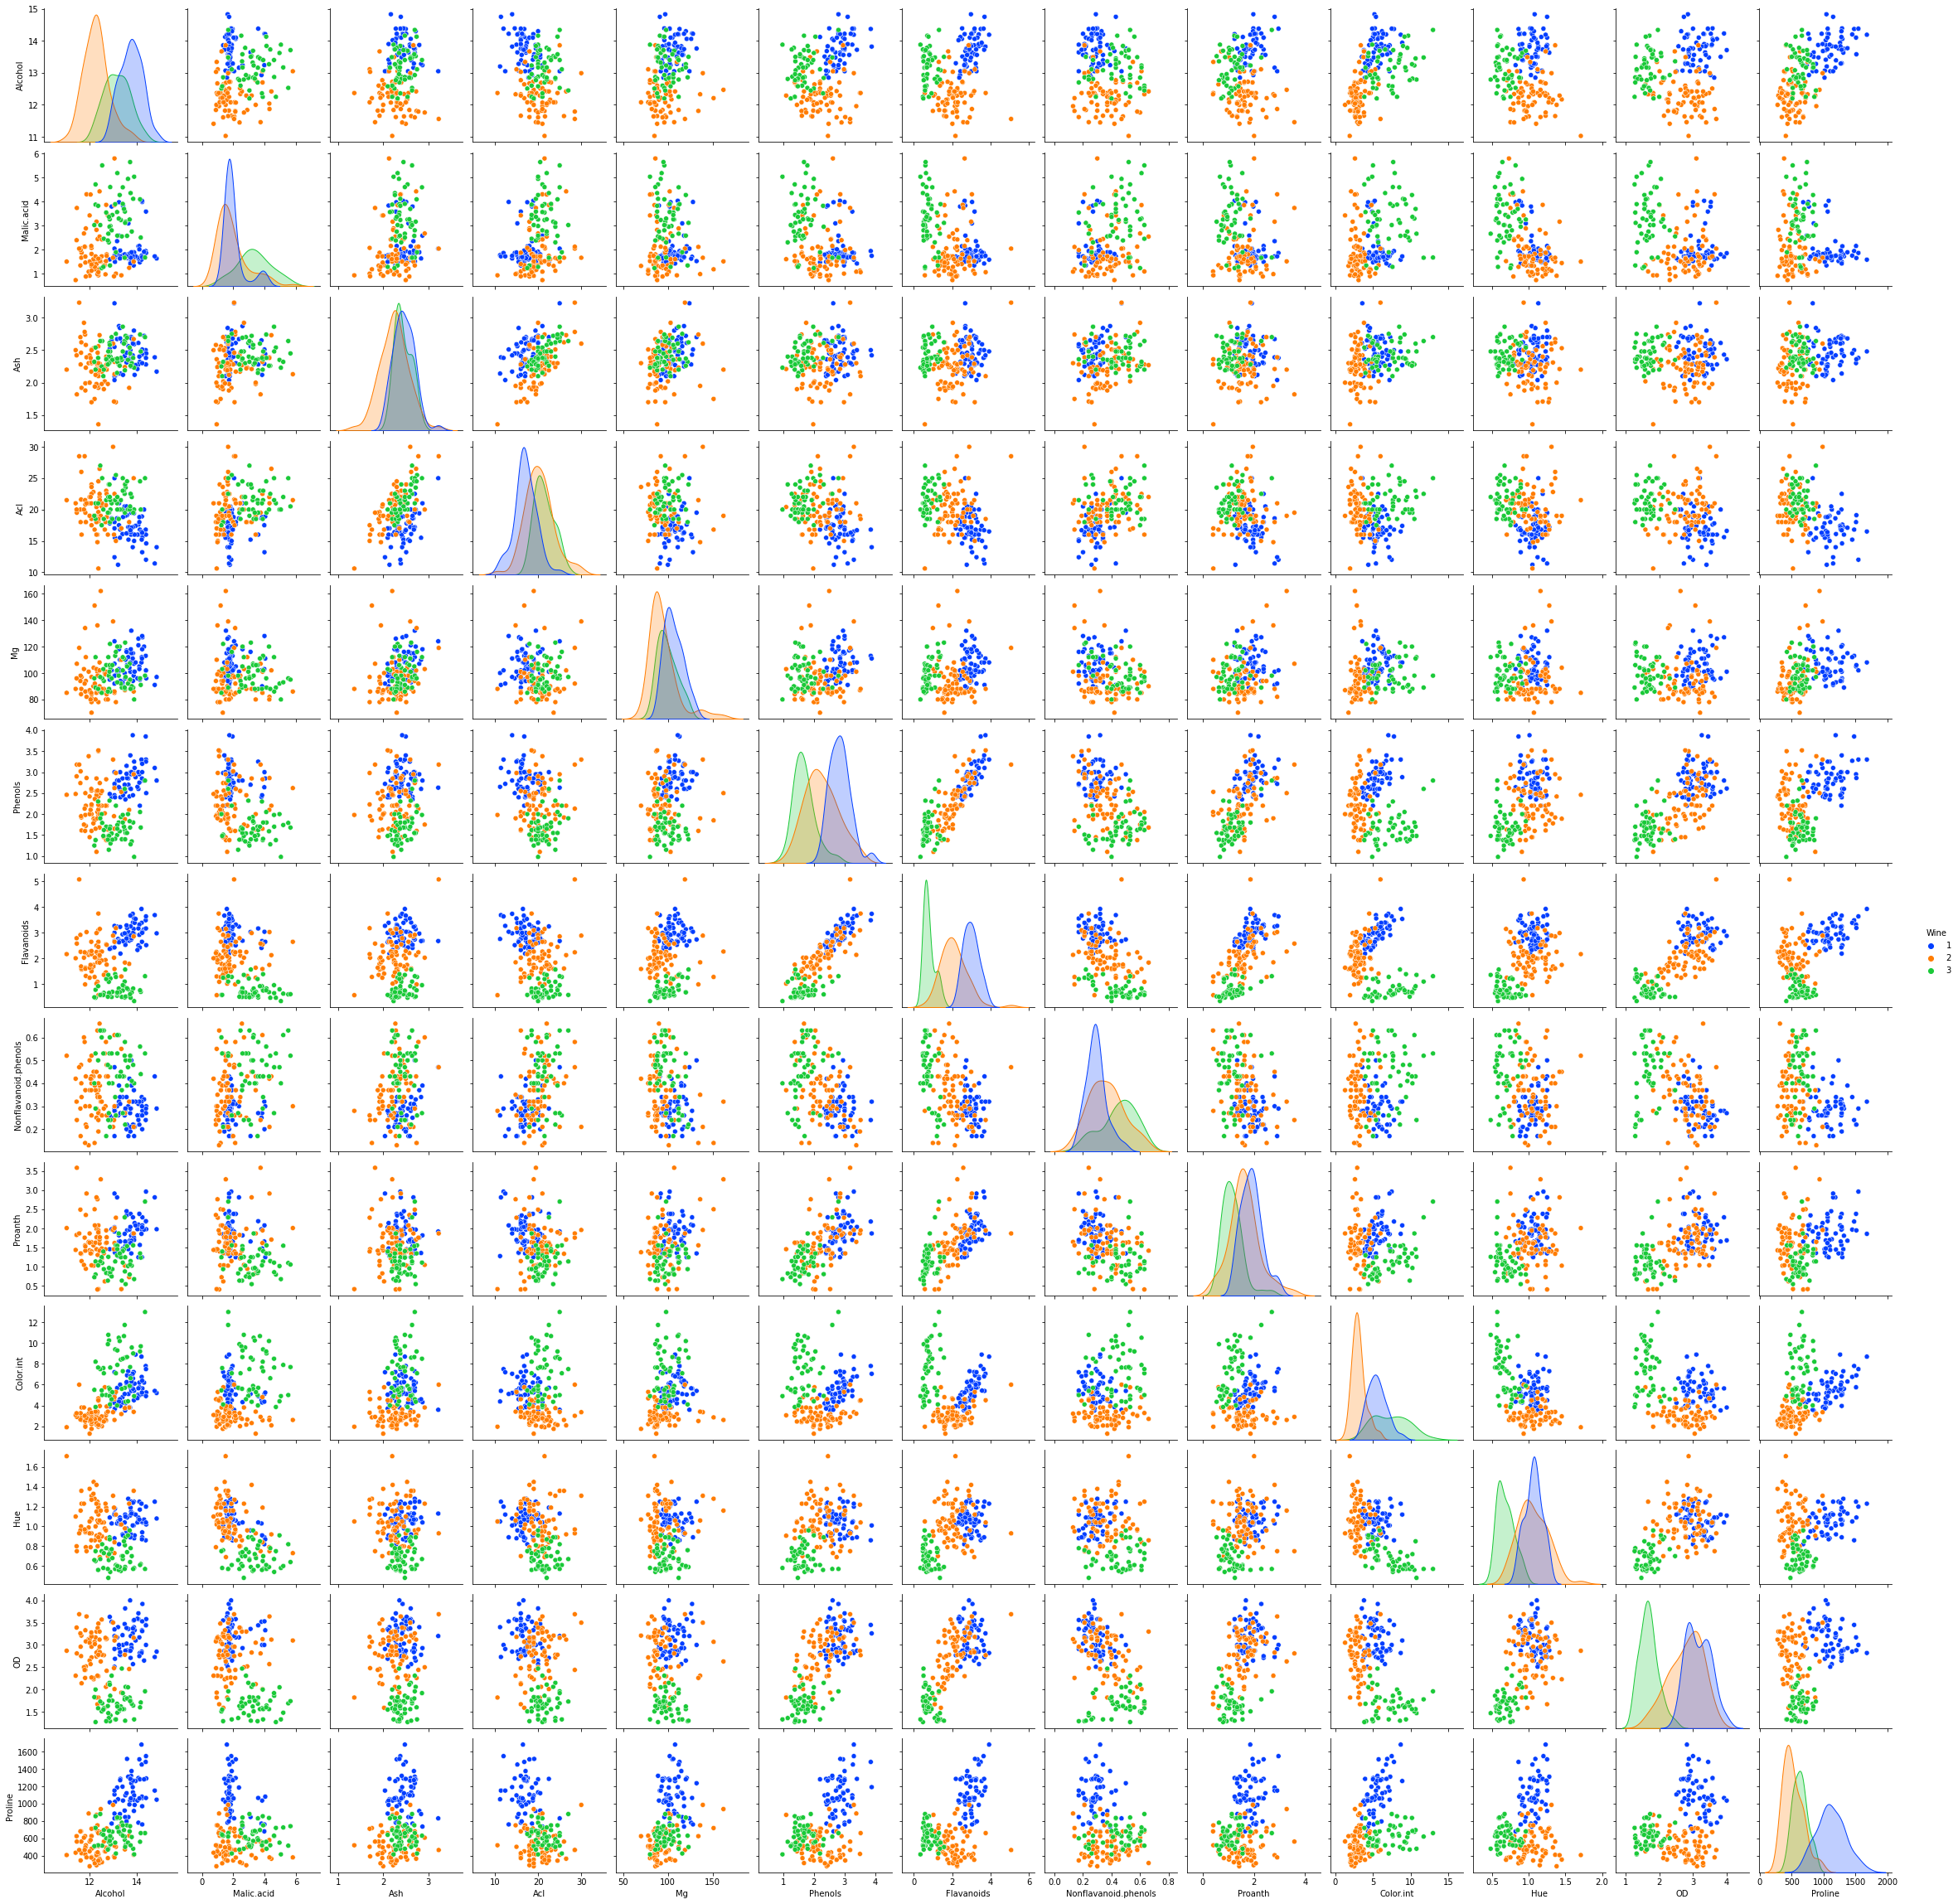

In [4]:
# Pairplot to visualize relationships between variables
sns.pairplot(data, hue='Wine',palette='bright')
plt.show()

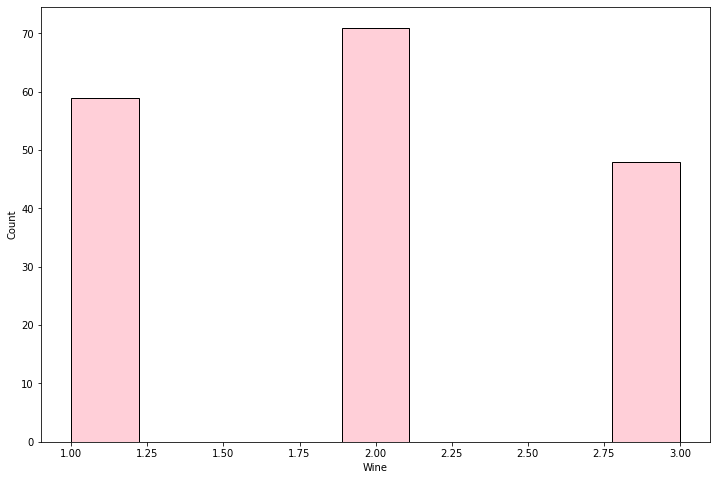

In [5]:
# Histogram to visualise the target
plt.figure(figsize=(12,8))
sns.histplot(data['Wine'], color='pink')
plt.show()

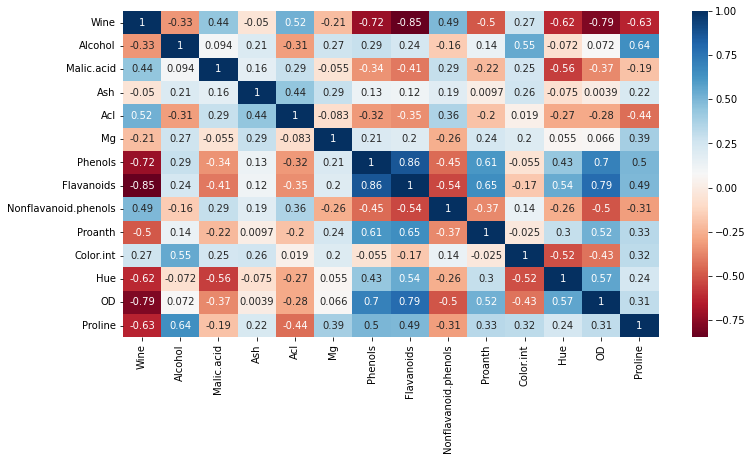

In [6]:
# Correlation matrix for the dataset
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')
plt.show()

In [7]:
# Preprocess the data
X = data.drop('Wine', axis=1)
y = data['Wine']

In [8]:
y = pd.get_dummies(y).values
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [13]:
model = Sequential()

col = int(len(data.columns)) - 1

# Build the model
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu')) 
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(3,activation = "softmax"))
model.summary()

# categorical_crossentropy due to multiclass
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=['accuracy'])

# early stopping callback
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=50)
                   
# now we just update our model fit call
history = model.fit(X, y, callbacks=es, epochs=150, batch_size=4, validation_split=0.2, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_4 (Dense)             (None, 32)                448       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 4,739
Trainable params: 4,739
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
36/36 [==============================] - 2s 16ms/step - loss: 7.4324 - accuracy: 0.5915 - val_loss: 34.0743 - val_accuracy: 0.0000e+00
Epoch 2/150
36/36 [==============================] - 0s 6ms/step - loss: 2.7839 - accuracy: 0.6901 - val_loss: 15.3621 - val_accuracy: 0.0000e+00
Epoch 3/150
36/36 [==========================

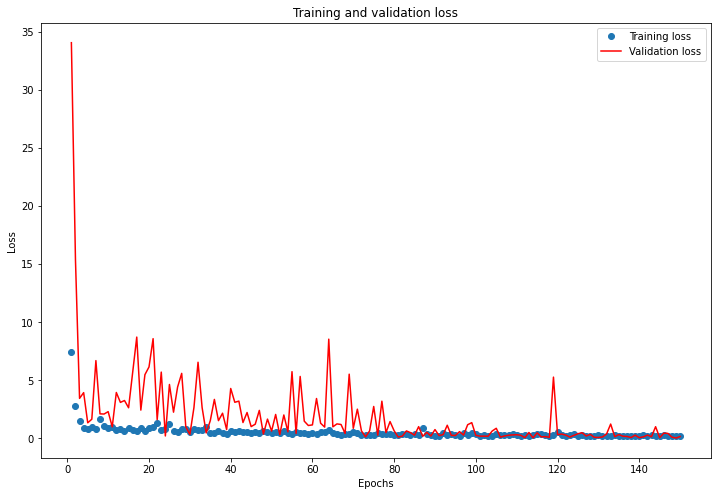

In [14]:
history_dict = history.history

# loss
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.figure(figsize=(12,8))
plt.plot(epochs, loss_values, 'o', label='Training loss')
plt.plot(epochs, val_loss_values, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

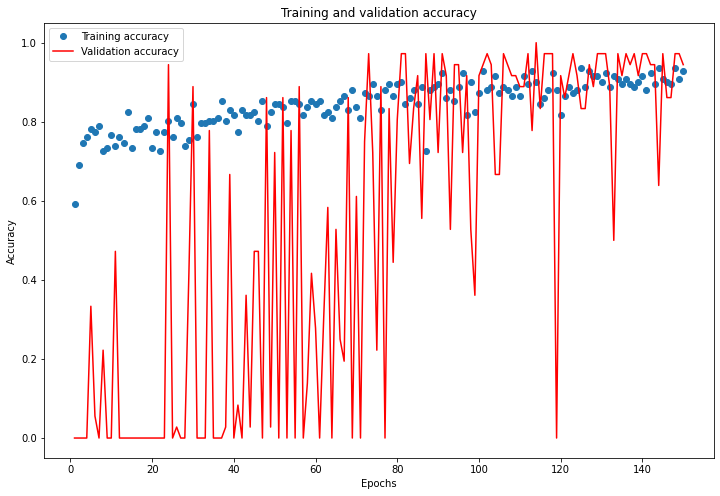

1.0

In [15]:
# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
plt.figure(figsize=(12,8))
plt.plot(epochs, acc,'o', label='Training accuracy')
plt.plot(epochs, val_acc, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

np.max(val_acc)

In [16]:
y_pred = np.round(model.predict(X), 0)

# Evaluation Metrics
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

6/6 [==============================] - 0s 3ms/step
Accuracy: 0.9213483146067416
